# LOGISTIC REGRESSION  
* Only to predict placed or not information


In [27]:
import pandas as pd
import numpy as np

# Model Requirements
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Plot
import matplotlib.pyplot as plt
import seaborn as sns


#Loading the  csv file 
placement=pd.read_csv("Placement_Data_Full_Class.csv")
placement.drop(columns=['sl_no','salary'], inplace=True)# Drop sl_no & salary 

In [28]:
for col in placement.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {placement[col].unique()}")

gender: ['M' 'F']
ssc_b: ['Others' 'Central']
hsc_b: ['Others' 'Central']
hsc_s: ['Commerce' 'Science' 'Arts']
degree_t: ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex: ['No' 'Yes']
specialisation: ['Mkt&HR' 'Mkt&Fin']
status: ['Placed' 'Not Placed']


In [29]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in placement.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(placement[col].unique())

    # Transform the column using the encoder
    placement[col] = label_encoder.transform(placement[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {placement[col].unique()}")

gender: [1 0]
ssc_b: [1 0]
hsc_b: [1 0]
hsc_s: [1 2 0]
degree_t: [2 0 1]
workex: [0 1]
specialisation: [1 0]
status: [1 0]


<Axes: >

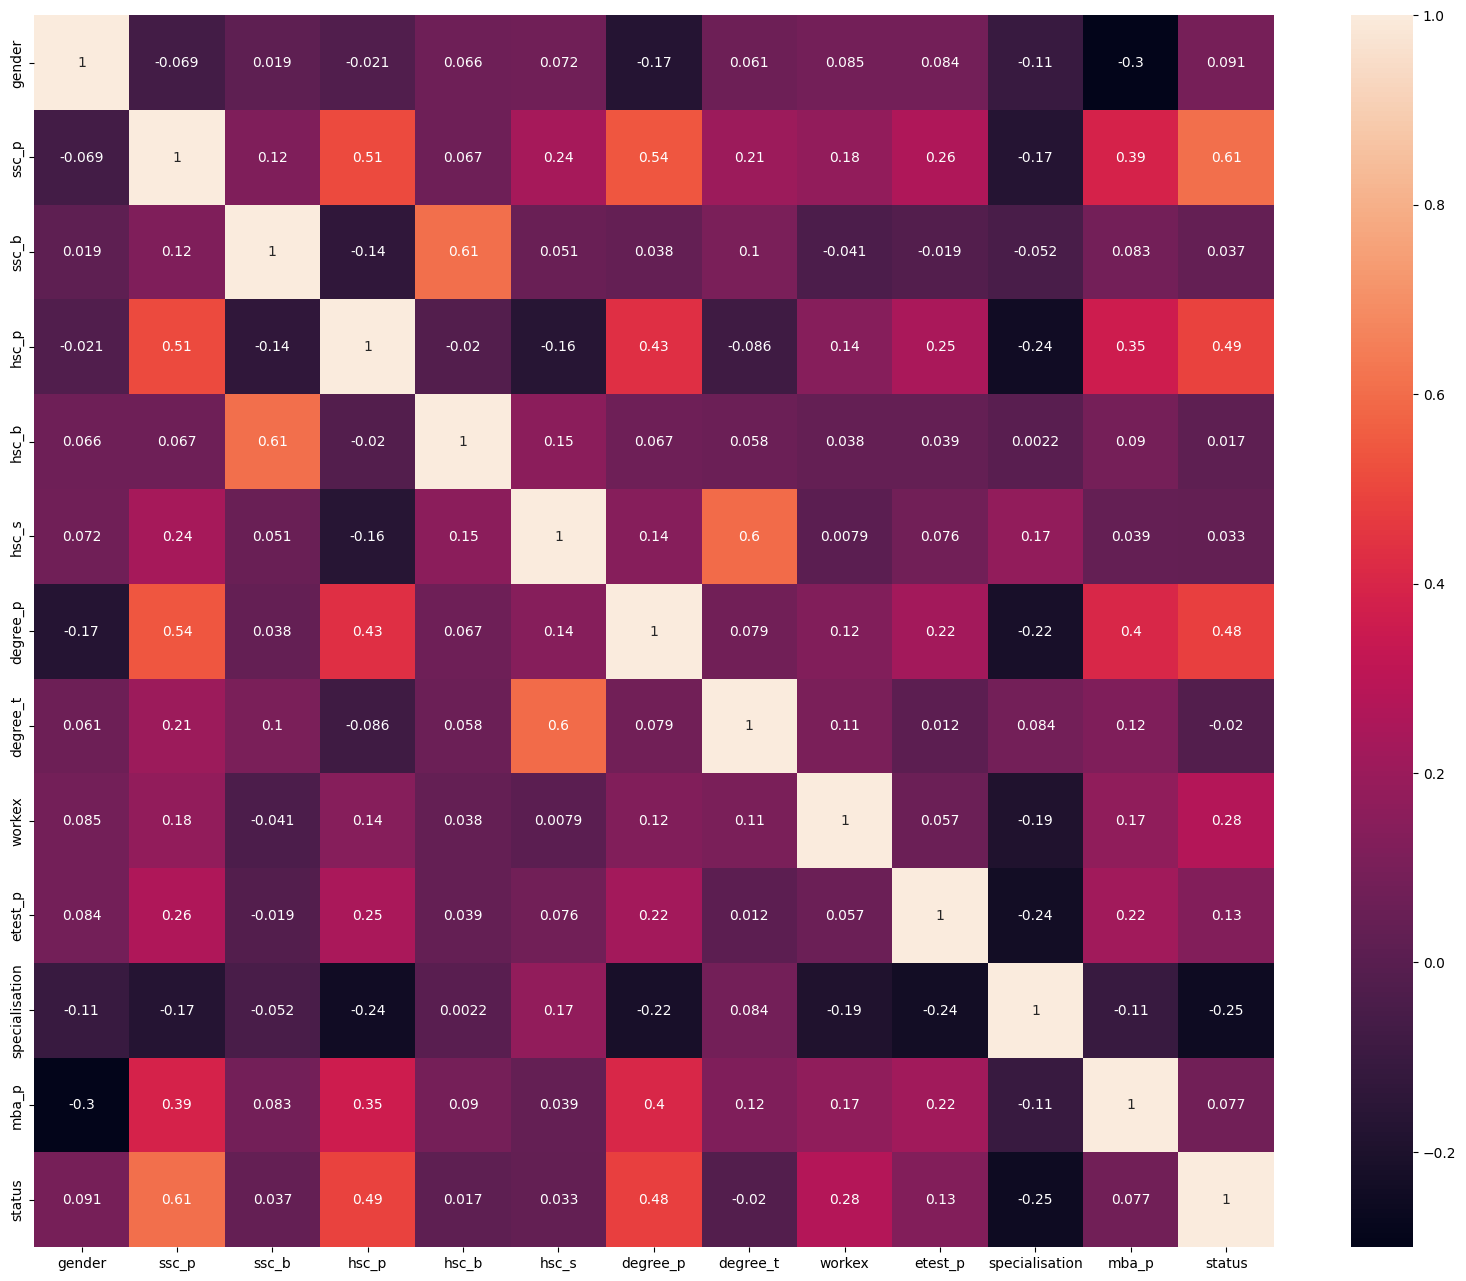

In [30]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(placement.corr(), fmt='.2g', annot=True)

In [31]:
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [32]:
# Data Preprocessing 
x=placement.drop(['status'],axis=1)
y=placement.status


X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size=0.2, random_state=0)

In [33]:
# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
Y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

Logistic Regression Accuracy: 0.813953488372093


c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression.fit(X_train_scaled, Y_train)
Y_pred_lr = logistic_regression.predict(X_test_scaled)

accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

Logistic Regression Accuracy: 0.813953488372093


In [35]:
# Regularization
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)

best_lr_model = grid_search.best_estimator_
Y_pred_lr_tuned = best_lr_model.predict(X_test_scaled)


In [36]:
#Polynomial Features

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train Logistic Regression model with Polynomial Features
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_poly, Y_train)

# Make predictions on the test set
Y_pred_lr = logistic_regression.predict(X_test_poly)

# Evaluate accuracy
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print(f"Logistic Regression Accuracy with Polynomial Features: {accuracy_lr}")

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_poly, Y_train)

# Get the best Logistic Regression model after tuning
best_lr_model = grid_search.best_estimator_

# Make predictions on the test set with the tuned model
Y_pred_lr_tuned = best_lr_model.predict(X_test_poly)

# Evaluate accuracy of the tuned model
accuracy_lr_tuned = accuracy_score(Y_test, Y_pred_lr_tuned)
print(f"Tuned Logistic Regression Accuracy with Polynomial Features: {accuracy_lr_tuned}")


Logistic Regression Accuracy with Polynomial Features: 0.6976744186046512
Tuned Logistic Regression Accuracy with Polynomial Features: 0.6976744186046512


In [37]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

cross_val_accuracy = cross_val_score(best_lr_model, X_train_scaled, Y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cross_val_accuracy.mean()}")


Cross-Validation Accuracy: 0.8778151260504201
